In [1]:
from sklearn import svm, linear_model, cross_validation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[[  1.37096511e-01   3.72668329e-03]
 [  2.11562385e-01   8.09956656e-06]
 [  1.48338529e-01   1.17949488e-04]
 [  8.17152110e-02   9.07904760e-06]
 [  1.33828560e-01   3.70600693e-05]
 [  6.26665718e-02   8.59685158e-06]
 [  7.17787958e-02   7.23169952e-06]
 [  6.66523104e-02   1.19938881e-05]
 [  1.39079769e-01   7.13376053e-06]
 [  2.19888760e-01   6.98388277e-06]]
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


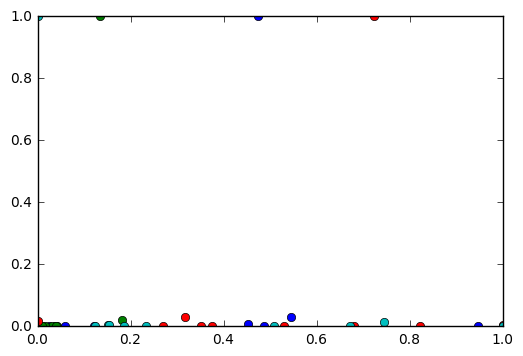

In [108]:
CristinaLopes = np.genfromtxt("cristinalopes_g.txt",delimiter=None)
ihler = np.genfromtxt("ihler_g.txt",delimiter=None)
machinelearning = np.genfromtxt("machinelearning_g.txt",delimiter=None)
acm = np.genfromtxt("xiaohuixie_g.txt",delimiter=None)
X = CristinaLopes[:, :2]
Y = CristinaLopes[:, -1]
X_i = ihler[:, :2]
Y_i = ihler[:, -1]
X_m = machinelearning[:, :2]
Y_m = machinelearning[:, -1]
X_a = acm[:, :2]
Y_a = acm[:, -1]
poly = PolynomialFeatures(2)
print X
print Y
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X_i = min_max_scaler.fit_transform(X_i)
X_m = min_max_scaler.fit_transform(X_m)
X_a = min_max_scaler.fit_transform(X_a)
# X[:, 0] = (X[:, 0] - np.min(X[:, 0])) / (np.max(X[:, 0]) - np.min(X[:, 0]))
# X[:, 1] = (X[:, 1] - np.min(X[:, 1])) / (np.max(X[:, 1]) - np.min(X[:, 1]))
# X_i[:, 0] = (X_i[:, 0] - np.min(X_i[:, 0])) / (np.max(X_i[:, 0]) - np.min(X_i[:, 0]))
# X_i[:, 1] = (X_i[:, 1] - np.min(X_i[:, 1])) / (np.max(X_i[:, 1]) - np.min(X_i[:, 1]))
plt.plot(X[:, 0], X[:, 1], 'o')
plt.plot(X_i[:, 0], X_i[:, 1], 'o')
plt.plot(X_m[:, 0], X_m[:, 1], 'o')
plt.plot(X_a[:, 0], X_a[:, 1], 'o')
plt.show()

In [109]:
Xtr, Ytr = [], []
Xtr_i, Ytr_i = [], []
Xtr_m, Ytr_m = [], []
Xtr_a, Ytr_a = [], []
print X.shape
print Y.shape
for i, row in enumerate(X):
    for j, row2 in enumerate(X):
        if (i == j): continue
        else:
            Xtr.append(row - row2)
            Ytr.append(Y[i] - Y[j] < 0)
for i, row in enumerate(X_i):
    for j, row2 in enumerate(X_i):
        if (i == j): continue
        else:
            Xtr_i.append(row - row2)
            Ytr_i.append(Y_i[i] - Y_i[j] < 0)
for i, row in enumerate(X_m):
    for j, row2 in enumerate(X_m):
        if (i == j): continue
        else:
            Xtr_m.append(row - row2)
            Ytr_m.append(Y_m[i] - Y_m[j] < 0)
for i, row in enumerate(X_a):
    for j, row2 in enumerate(X_a):
        if (i == j): continue
        else:
            Xtr_a.append(row - row2)
            Ytr_a.append(Y_a[i] - Y_a[j] < 0)
            
Xtr = np.concatenate((Xtr, Xtr_i), 0)
Ytr = np.concatenate((Ytr, Ytr_i), 0)
Xtr = np.concatenate((Xtr, Xtr_m), 0)
Ytr = np.concatenate((Ytr, Ytr_m), 0)
Xtr = np.concatenate((Xtr, Xtr_a), 0)
Ytr = np.concatenate((Ytr, Ytr_a), 0)
Xtr, Ytr= map(np.asanyarray, (Xtr, Ytr))
print Xtr.shape, Ytr.shape
#print Xtr
#print Ytr

(10, 2)
(10,)
(360, 2) (360,)


False
True


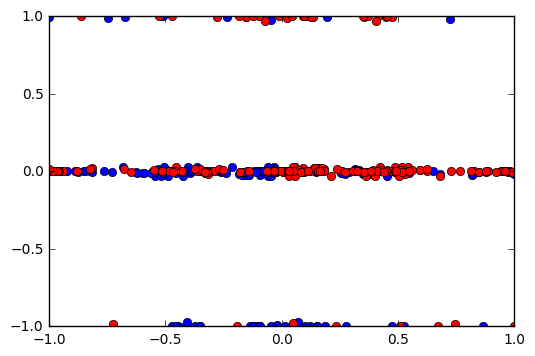

In [110]:
colors = ['b','r', 'g']
# Ytr = np.array([1, 0])
# Xtr = np.array([[2, -1], [0, 1]])  
for c in np.unique(Ytr):
    print c
    plt.plot(Xtr[Ytr==c, 0], Xtr[Ytr==c,1], 'o', color=colors[int(c)])
plt.show()

In [117]:
#X_test = scaler.transform(Xtest)  

clf = svm.SVC(C=1e-6, kernel = 'linear')
clf.fit(Xtr, Ytr)
print clf.coef_
print clf.intercept_

[[  3.40987741e-05   4.06566670e-05]]
[-0.]


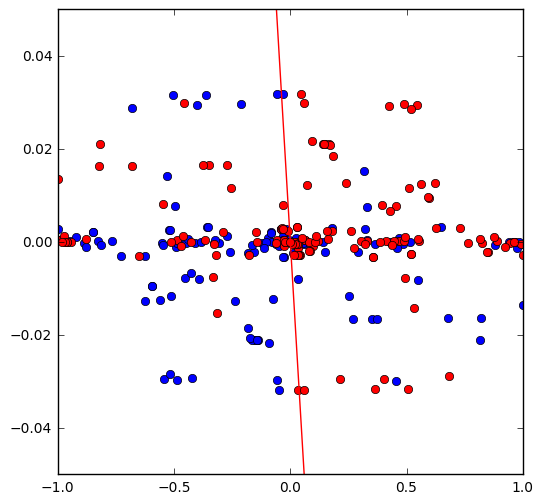

[ 0.64260821  0.76619494]
[  1.07040957e+00   6.08805953e-01   3.73020731e-01   7.82883397e-02
   2.97052846e-01   3.32244196e-04   3.72950892e-02   1.73227321e-02
   3.12351599e-01   6.42608213e-01]
0.683333333333
0.755555555556


In [118]:
xs = np.linspace(-0.2, 0.2, 200)
W=clf.coef_[0]
B=clf.intercept_[0]
ys = - W[0] / W[1] * xs - B / W[1]
x_space = np.linspace(-0.2, 0.2)
#print ys
plt.figure(figsize=(6,6))
plt.axis((-1.0,1.0,-0.05,0.05))
for c in np.unique(Ytr):
    plt.plot(Xtr[Ytr==c, 0], Xtr[Ytr==c,1], 'o', color=colors[int(c)])
plt.plot(xs, ys, 'r')
plt.show()
#print X.dot(np.linalg.inv(clf.coef_.T))
coef = clf.coef_.ravel() / np.linalg.norm(clf.coef_)
print coef
print X.dot(coef)
print clf.score(Xtr, Ytr)
print clf.score(Xtr_a, Ytr_a)

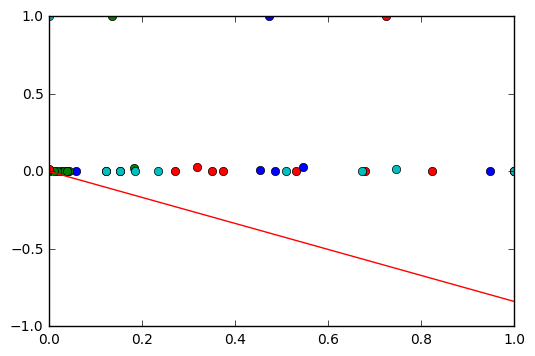

[  3.40987741e-05   4.06566670e-05]
[[  5.67992339e-05]
 [  3.23051219e-05]
 [  1.97936307e-05]
 [  4.15422080e-06]
 [  1.57625404e-05]
 [  1.76299019e-08]
 [  1.97899248e-06]
 [  9.19197600e-07]
 [  1.65743394e-05]
 [  3.40987741e-05]]
[  5.67992339e-05   3.23051219e-05   1.97936307e-05   4.15422080e-06
   1.57625404e-05   1.76299019e-08   1.97899248e-06   9.19197600e-07
   1.65743394e-05   3.40987741e-05]
[  1.07040957e+00   6.08805953e-01   3.73020731e-01   7.82883397e-02
   2.97052846e-01   3.32244196e-04   3.72950892e-02   1.73227321e-02
   3.12351599e-01   6.42608213e-01]


In [119]:
xs = np.linspace(0.0, 1.0, 200)
ys = - W[0] / W[1] * xs - B / W[1]
coef = clf.coef_.ravel() / np.linalg.norm(clf.coef_)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.plot(X_i[:, 0], X_i[:, 1], 'o')
plt.plot(X_m[:, 0], X_m[:, 1], 'o')
plt.plot(X_a[:, 0], X_a[:, 1], 'o')
plt.plot(xs, ys, 'r')
plt.show()
print clf.coef_.ravel()
print X.dot(clf.coef_.T)
print np.dot(X, clf.coef_.ravel())
print np.dot(X, coef)